# Explore here

Cargamos las fotos de los animales y los visualizamos

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
data_dir = "../data/raw"  # Asegúrate de que tus carpetas 'cat' y 'dog' estén aquí

image_size = (224, 224)
batch_size = 8  # Puedes subir esto si tienes más imágenes

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

2025-04-18 03:58:50.160941: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 03:58:50.165198: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 03:58:50.175314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744948730.191875    2475 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744948730.196761    2475 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744948730.211318    2475 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Found 16 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [2]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capa base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-04-18 03:58:53.457452: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Construimos el RNA

In [3]:
# --- ENTRENAMIENTO DEL MODELO ---
checkpoint = ModelCheckpoint("../models/mobilenetv2_best.h5", save_best_only=True, monitor="val_accuracy", verbose=1)
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint, early]
)

Epoch 1/10


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6562 - loss: 0.6110
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ../models/mobilenetv2_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6667 - loss: 0.6092 - val_accuracy: 0.5000 - val_loss: 1.0235
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8750 - loss: 0.4536
Epoch 2: val_accuracy did not improve from 0.50000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8750 - loss: 0.4503 - val_accuracy: 0.5000 - val_loss: 0.9320
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.3465
Epoch 3: val_accuracy did not improve from 0.50000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 1.0000 - loss: 0.3403 - val_accuracy: 0.5000 - val_loss: 0.8611
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.2478
Epoch 4: val_accuracy did not improve from 0.50000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 1.0000 - loss: 0.2444 - val_accuracy: 0.5000 - val_loss: 0.7924
Epoch 4: early stopping


In [4]:
# --- GUARDAR MODELO FINAL EN .H5 ---
model.save("../models/mobilenetv2_final.h5")


In [5]:
# --- CONVERTIR Y GUARDAR MODELO EN .TFLITE ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("../models/mobilenetv2_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpk93iw_kh/assets


INFO:tensorflow:Assets written to: /tmp/tmpk93iw_kh/assets


Saved artifact at '/tmp/tmpk93iw_kh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140419950089360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950089936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950091856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950091472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950090320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950092048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950091088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950089552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950092240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140419950090128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14041995009262

W0000 00:00:1744948749.179373    2475 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744948749.179399    2475 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-18 03:59:09.179820: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpk93iw_kh
2025-04-18 03:59:09.190954: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-18 03:59:09.190966: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpk93iw_kh
I0000 00:00:1744948749.287603    2475 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-18 03:59:09.302785: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-18 03:59:09.862071: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpk93iw_kh
2025-04-18 03:59:10.032377: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

In [6]:
# --- VERIFICAR TAMAÑO DE LOS ARCHIVOS GUARDADOS ---
!ls -lh ../models/


total 32M
-rw-r--r-- 1 gitpod gitpod  12M Apr 18 03:59 mobilenetv2_best.h5
-rw-r--r-- 1 gitpod gitpod  12M Apr 18 03:59 mobilenetv2_final.h5
-rw-r--r-- 1 gitpod gitpod 9.1M Apr 18 03:59 mobilenetv2_model.tflite


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


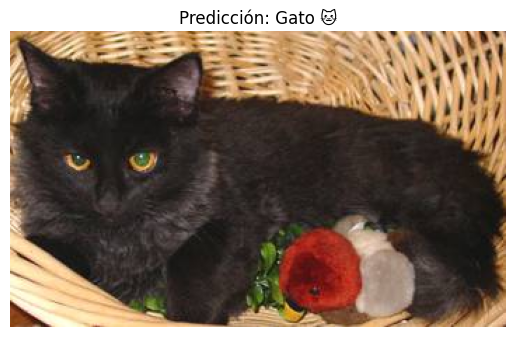

In [9]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y preprocesar
img_path = "/workspace/ML-Clasificar-Imagenes/data/test/999.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # <-- Ojo, MobileNet usa 224x224
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalizar
img_array = np.expand_dims(img_array, axis=0)

# Cargar modelo entrenado
model = load_model("../models/mobilenetv2_final.h5")

# Predecir
prediction = model.predict(img_array)

# Mostrar imagen y resultado
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title("Predicción: " + ("Perro 🐶" if prediction[0][1] > prediction[0][0] else "Gato 🐱"))
plt.show()
